# Case Study: Analysis of the monthly data of Australian beer production in the $20^{th}$ century

### In this case study, we will look at how to read Time Series data and look at various measures of decomposition of the Time Series data. We will also look at various exploratory data analysis measures for Time Series data.

## Importing Necessary Packages

In [ ]:
# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

# Data manipulaton libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display

# TS analysis libraries
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import month_plot
from calendar import month_abbr

# Setting the background theme and font scale for figures
sns.set_theme(style = 'darkgrid', font_scale = 1.15)

# To restrict the float value to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Importing the Dataset

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive/')

# Loading the data
df = pd.read_csv('/content/drive/MyDrive/Python_files/Beer_Australia.csv')

Mounted at /content/drive/


In [ ]:
# Checking the first few rows
print('The first 5 observations:')
display(df.head())
# Checking the last few rows
print('\nThe last 5 observations:')
display(df.tail())

The first 5 observations:


,Month,Monthly beer production
0,1956-01,93.20
1,1956-02,96.00
2,1956-03,95.20
3,1956-04,77.10
4,1956-05,70.90



The last 5 observations:


,Month,Monthly beer production
471,1995-04,127.00
472,1995-05,151.00
473,1995-06,130.00
474,1995-07,119.00
475,1995-08,153.00


In [ ]:
# Checking the shape of the dataset
print('The dataset has {} observations.'.format(df.shape[0]))

The dataset has 476 observations.


In [ ]:
# Renaming the TS
df.rename(columns = {'Monthly beer production': 'Beer_Production'}, inplace = True)

# Generating timestamp for the data
dates = pd.date_range(start = '1/1/1956', periods = df.shape[0], freq = 'M')
df['Date'] = dates

# Setting the date column as index
df = df.set_index(keys = 'Date')

# Dropping the month column
df.drop(columns = 'Month', axis = 1, inplace = True)

# Adding year and month features (separately)
df['Year'] = df.index.year
df['Month'] = df.index.month_name()
df.head()

,Beer_Production,Year,Month
Date,,,
1956-01-31,93.20,1956,January
1956-02-29,96.00,1956,February
1956-03-31,95.20,1956,March
1956-04-30,77.10,1956,April
1956-05-31,70.90,1956,May


In [ ]:
# Converting month names to their abbrevations
def month_abbrev(month):
    return str(month)[0:3]

# Converting month names into their abbreviations
df['Month'] = df['Month'].apply(month_abbrev)
df.head()

,Beer_Production,Year,Month
Date,,,
1956-01-31,93.20,1956,Jan
1956-02-29,96.00,1956,Feb
1956-03-31,95.20,1956,Mar
1956-04-30,77.10,1956,Apr
1956-05-31,70.90,1956,May


## Exploratory Data Analysis

### Statistical Description of the Data

In [ ]:
# Let's temporarily convert year into a categorical variable
df['Year'] = pd.Categorical(df['Year'])
# Numerical variables
df.describe(include = np.number).T

,count,mean,std,min,25%,50%,75%,max
Beer_Production,476.00,136.40,33.74,64.80,112.90,139.15,158.82,217.80


In [ ]:
# Categorical variables
df.describe(include = ['object', 'category']).T

,count,unique,top,freq
Year,476,40,1956,12
Month,476,12,Jan,40


In [ ]:
# Checking the datatypes
df['Year'] = df['Year'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 476 entries, 1956-01-31 to 1995-08-31
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Beer_Production  476 non-null    float64
 1   Year             476 non-null    int64  
 2   Month            476 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 14.9+ KB


### Plotting the Time Series Along With its Mean and Median

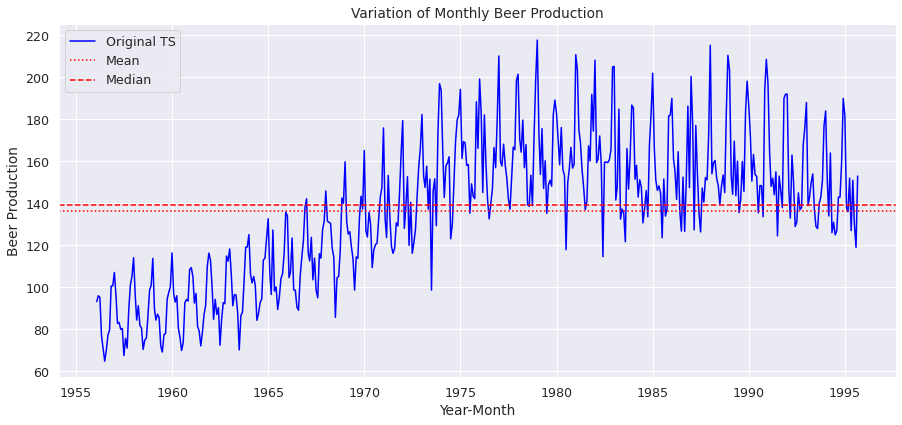

In [ ]:
plt.figure(figsize = (15, 6.5));
plt.plot(df.index, df.Beer_Production, color = 'blue');
plt.axhline(df.Beer_Production.mean(), color = 'red', linestyle = ':');
plt.axhline(df.Beer_Production.median(), color = 'red', linestyle = '--');
plt.legend(['Original TS', 'Mean', 'Median'], loc = 'upper left');
plt.xlabel('Year-Month');
plt.ylabel('Beer Production');
plt.title('Variation of Monthly Beer Production');

### Annual Distribution of Beer Production

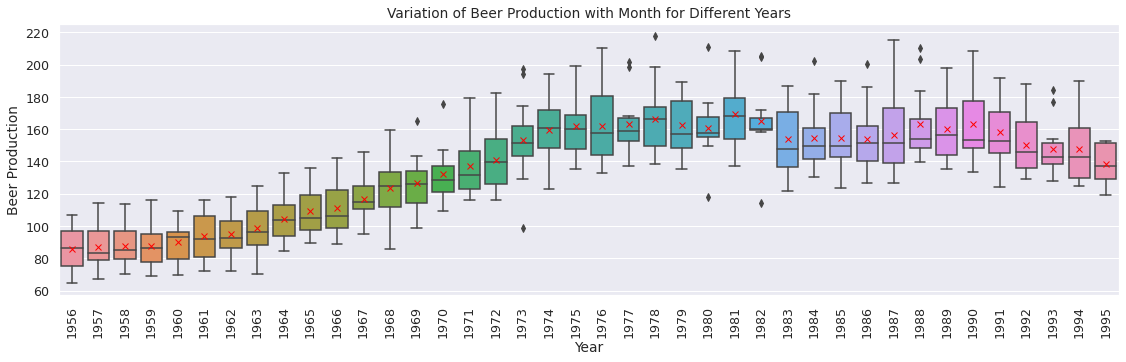

In [ ]:
plt.figure(figsize = (19, 5));
sns.boxplot(data = df, x = 'Year', y = 'Beer_Production', showmeans = True, meanprops = 
            {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '5.5'});
plt.xticks(rotation = 90);
plt.xlabel('Year');
plt.ylabel('Beer Production');
plt.title('Variation of Beer Production with Month for Different Years');

### Monthly Distribution of Beer Production

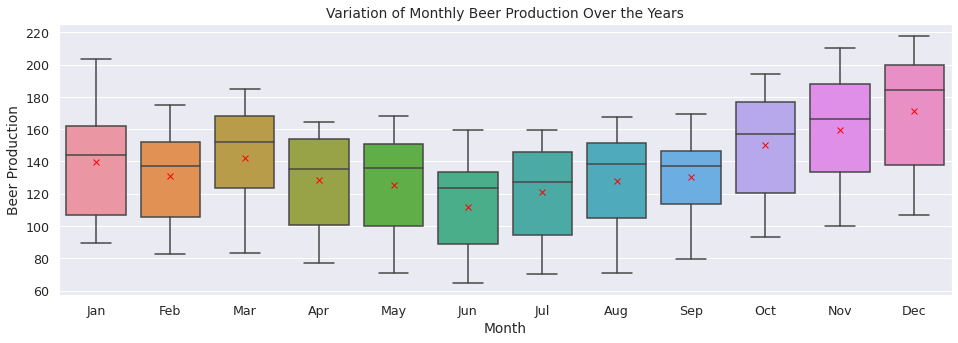

In [ ]:
plt.figure(figsize = (16, 5));
sns.boxplot(data = df, x = 'Month', y = 'Beer_Production', showmeans = True, meanprops = 
            {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '5.5'});
#plt.xticks(rotation = 90);
plt.xlabel('Month');
plt.ylabel('Beer Production');
plt.title('Variation of Monthly Beer Production Over the Years');

### Time Series Plots of Different Months

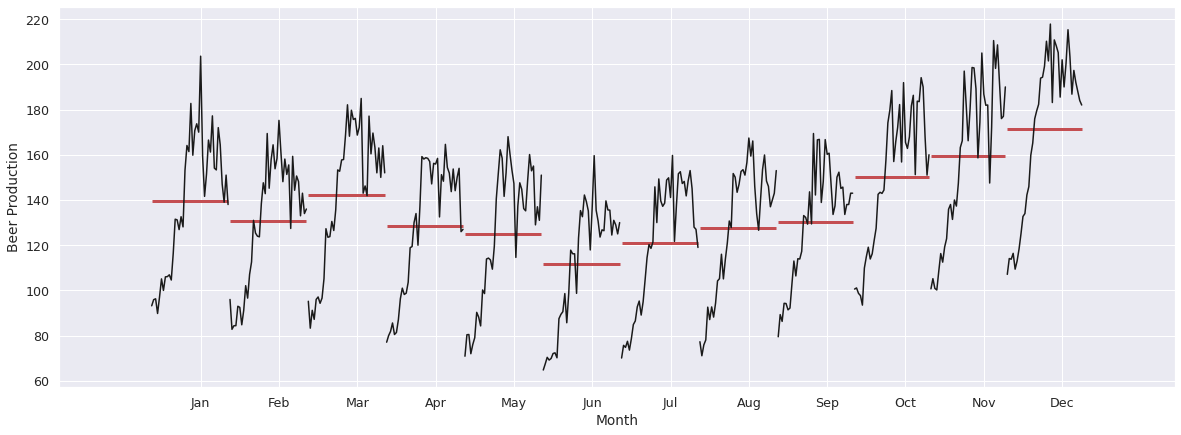

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = (20, 7);
month_plot(df['Beer_Production']);
plt.ylabel('Beer Production');
plt.xlabel('Month');
plt.xticks(ticks = np.arange(25, df.shape[0], 40), labels = month_abbr[1:13]);

### Variation of Beer Production with Each Year

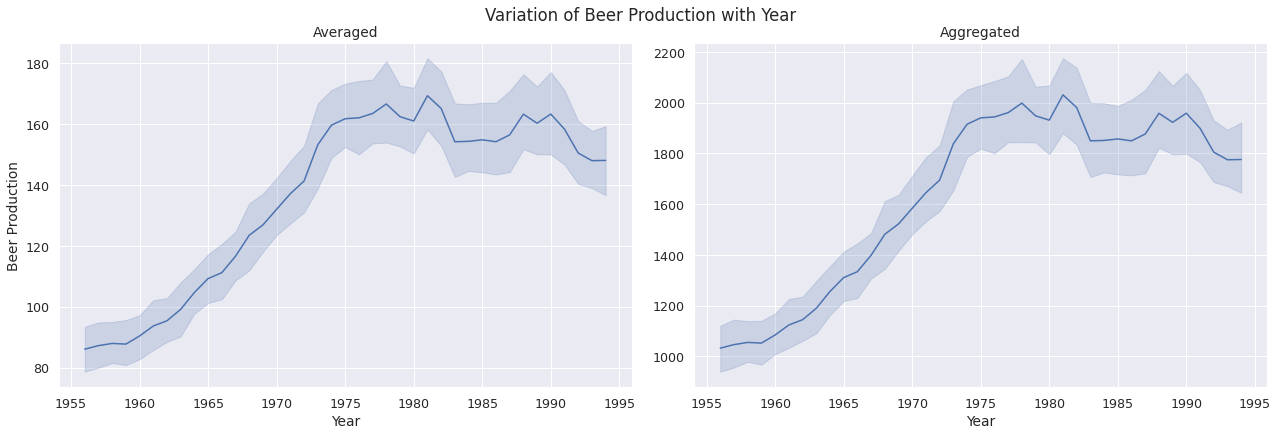

In [ ]:
plt.figure(figsize = (18, 6));
plt.suptitle('Variation of Beer Production with Year', y = 1.01);
plt.subplot(121);
sns.lineplot(data = df.loc[df.Year < 1995], x = 'Year', y = 'Beer_Production', estimator = 'mean', ci = 95);
plt.title('Averaged');
plt.ylabel('Beer Production');
plt.subplot(122);
sns.lineplot(data = df.loc[df.Year < 1995], x = 'Year', y = 'Beer_Production', estimator = 'sum', ci = 95);
plt.title('Aggregated');
plt.ylabel('');
plt.tight_layout();

#### Notes:

Since the data for the last year is incoplete (the last few months of 1995 aren't available), this year hasn't been depicted.

### Variation of Beer Production with Each Quarter

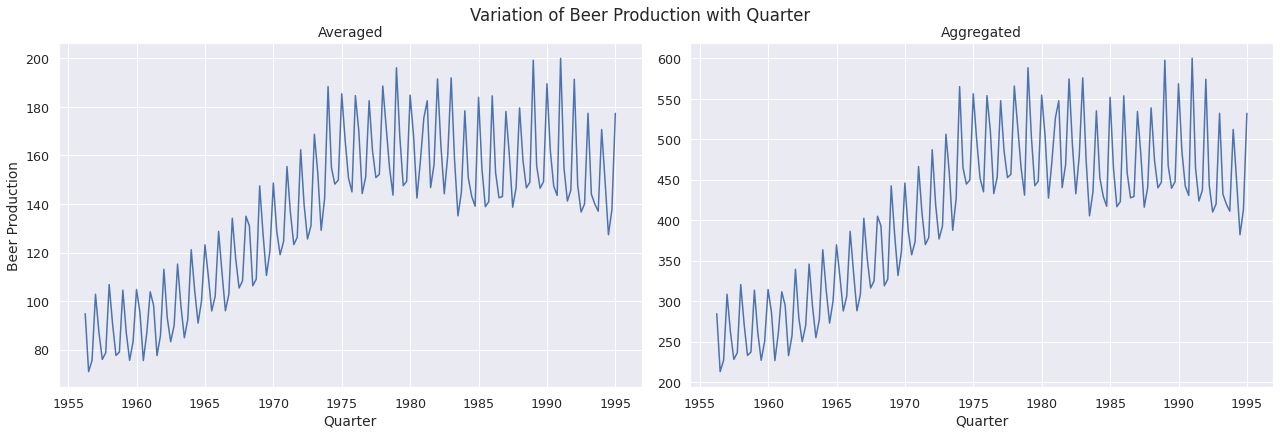

In [ ]:
plt.figure(figsize = (18, 6));
plt.suptitle('Variation of Beer Production with Quarter', y = 1.01);
plt.subplot(121);
plt.plot(df['Beer_Production'].loc[df['Year'] < 1995].resample('Q').mean());
plt.title('Averaged');
plt.xlabel('Quarter');
plt.ylabel('Beer Production');
plt.subplot(122);
plt.plot(df['Beer_Production'].loc[df['Year'] < 1995].resample('Q').sum());
plt.title('Aggregated');
plt.xlabel('Quarter');
plt.ylabel('');
plt.tight_layout();

#### Notes:

Since the data for the last year is incoplete (the last few months of 1995 aren't available), the information regarding this year hasn't been depicted.

### Variation of Beer Production with Each Decade

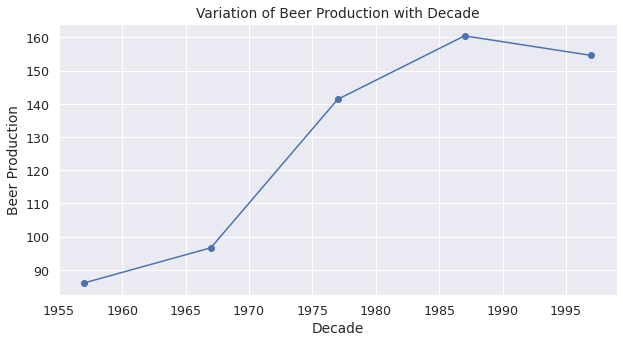

In [ ]:
plt.figure(figsize = (10, 5));
plt.title('Variation of Beer Production with Decade');
plt.plot(df['Beer_Production'].resample('10Y').mean(), marker = 'o');
plt.xlabel('Decade');
plt.ylabel('Beer Production');

#### Notes:

Since the last decade is incomplete, the plot has been shown only in the averaged form.

## Time Series Decomposition

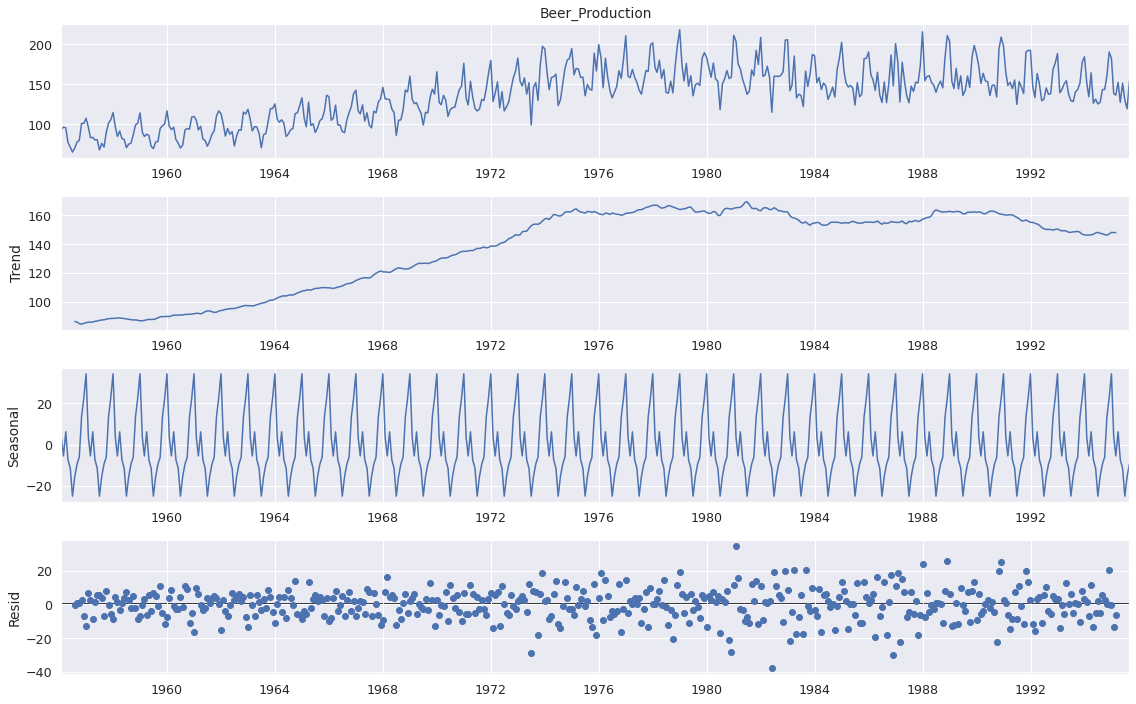

In [ ]:
rcParams['figure.figsize'] = 16, 10
df_decomposed = seasonal_decompose(df['Beer_Production'], model = 'additive');
df_decomposed.plot();
plt.show();

### Time Series with no Irregularity (Residual)

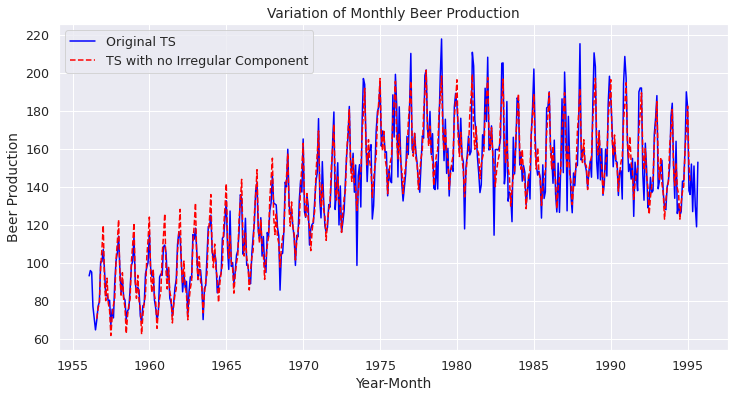

In [ ]:
plt.figure(figsize = (12, 6));
plt.plot(df['Beer_Production'], color = 'blue');
plt.plot(df['Beer_Production'] - df_decomposed.resid, color = 'red', linestyle = '--');
plt.xlabel('Year-Month');
plt.ylabel('Beer Production');
plt.legend(['Original TS', 'TS with no Irregular Component'], loc = 'upper left');
plt.title('Variation of Monthly Beer Production');

### Time Series with no Seasonality 

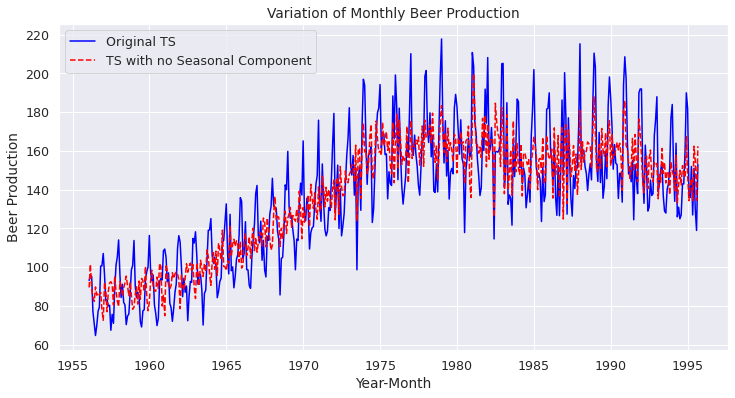

In [ ]:
plt.figure(figsize = (12, 6));
plt.plot(df['Beer_Production'], color = 'blue');
plt.plot(df['Beer_Production'] - df_decomposed.seasonal, color = 'red', linestyle = '--');
plt.xlabel('Year-Month');
plt.ylabel('Beer Production');
plt.legend(['Original TS', 'TS with no Seasonal Component'], loc = 'upper left');
plt.title('Variation of Monthly Beer Production');